# House Prices - Advanced Regression Techniques

Description
Start here if...
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

💡Getting Started Notebook
To get started quickly, feel free to take advantage of this starter notebook.

### Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting
Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

Photo by Tom Thain on Unsplash.

## Imports and Lab Setup



In [31]:
# for array computations and loading data
import numpy as np
import pandas as pd
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

%matplotlib widget
import matplotlib.pyplot as plt


from sklearn.linear_model import Ridge

# Data Input

In [2]:
# df=pd.read_csv('data//train.csv')
df=pd.read_csv('data//df_num_removed_2.csv')

In [3]:
df.head()

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,60,7,5,706,0,150,856,856,854,0,...,548,0,61,0,0,0,0,0,2,208500
1,20,6,8,978,0,284,1262,1262,0,0,...,460,298,0,0,0,0,0,0,5,181500
2,60,7,5,486,0,434,920,920,866,0,...,608,0,42,0,0,0,0,0,9,223500
3,70,7,5,216,0,540,756,961,756,0,...,642,0,35,272,0,0,0,0,2,140000
4,60,8,5,655,0,490,1145,1145,1053,0,...,836,192,84,0,0,0,0,0,12,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   OverallQual    1460 non-null   int64
 2   OverallCond    1460 non-null   int64
 3   BsmtFinSF1     1460 non-null   int64
 4   BsmtFinSF2     1460 non-null   int64
 5   BsmtUnfSF      1460 non-null   int64
 6   TotalBsmtSF    1460 non-null   int64
 7   1stFlrSF       1460 non-null   int64
 8   2ndFlrSF       1460 non-null   int64
 9   LowQualFinSF   1460 non-null   int64
 10  GrLivArea      1460 non-null   int64
 11  BsmtFullBath   1460 non-null   int64
 12  BsmtHalfBath   1460 non-null   int64
 13  FullBath       1460 non-null   int64
 14  HalfBath       1460 non-null   int64
 15  BedroomAbvGr   1460 non-null   int64
 16  KitchenAbvGr   1460 non-null   int64
 17  TotRmsAbvGrd   1460 non-null   int64
 18  Fireplaces     1460 non-null   int64
 19  Garage

In [5]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# Count the number of NaN values in the entire DataFrame
num_nan_in_df = df_num.isna().sum().sum()
print(f'Total number of NaN values in the DataFrame: {num_nan_in_df}')

Total number of NaN values in the DataFrame: 348


In [7]:
# Replace NaNs with the mean of the column:
#df_num_filled = df_num.fillna(df_num.mean())

In [8]:
# Remove cloumn with NaN values

df_num_removed = df_num.dropna(axis=1)

In [9]:
# Count the number of NaN values in the entire DataFrame
num_nan_in_df = df_num_removed.isna().sum().sum()
print(f'Total number of NaN values in the DataFrame: {num_nan_in_df}')

Total number of NaN values in the DataFrame: 0


In [10]:
df_num_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [9]:
df_num_removed.to_csv('df_num_removed.csv', index=False)

NameError: name 'df_num_removed' is not defined

In [5]:
x = np.array(df.iloc[:, :-2])
y = np.array(df['SalePrice'])	


In [11]:
x.shape

(1460, 28)

In [49]:
y.shape

(1460,)

In [6]:
print(x[:5])
print(y[:5])

[[  60    7    5  706    0  150  856  856  854    0 1710    1    0    2
     1    3    1    8    0    2  548    0   61    0    0    0    0    0]
 [  20    6    8  978    0  284 1262 1262    0    0 1262    0    1    2
     0    3    1    6    1    2  460  298    0    0    0    0    0    0]
 [  60    7    5  486    0  434  920  920  866    0 1786    1    0    2
     1    3    1    6    1    2  608    0   42    0    0    0    0    0]
 [  70    7    5  216    0  540  756  961  756    0 1717    1    0    1
     0    3    1    7    1    3  642    0   35  272    0    0    0    0]
 [  60    8    5  655    0  490 1145 1145 1053    0 2198    1    0    2
     1    4    1    9    1    3  836  192   84    0    0    0    0    0]]
[208500 181500 223500 140000 250000]


In [7]:
x.reshape(-1, 1)
y.reshape(-1, 1)

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [52]:
print(len(x))
print(len(y))

1460
1460


## Split the dataset into training, cross validation, and test sets






In [8]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (876, 28)
the shape of the training set (target) is: (876,)

the shape of the cross validation set (input) is: (292, 28)
the shape of the cross validation set (target) is: (292,)

the shape of the test set (input) is: (292, 28)
the shape of the test set (target) is: (292,)


## Plotting data

In [14]:
""""
from sklearn import dummy, metrics

# Assume y is your target variable
y_mean = np.mean(y)

# Create a dummy regressor that will always predict the mean
dummy_regr = dummy.DummyRegressor(strategy="mean")
dummy_regr.fit(x, y)

# Now you can use dummy_regr.predict(X) to get the baseline predictions
y_pred_baseline = dummy_regr.predict(x)

# And you can calculate the baseline error, for example using Mean Squared Error
mse_baseline = metrics.mean_squared_error(y, y_pred_baseline)

"""

'"\nfrom sklearn import dummy, metrics\n\n# Assume y is your target variable\ny_mean = np.mean(y)\n\n# Create a dummy regressor that will always predict the mean\ndummy_regr = dummy.DummyRegressor(strategy="mean")\ndummy_regr.fit(x, y)\n\n# Now you can use dummy_regr.predict(X) to get the baseline predictions\ny_pred_baseline = dummy_regr.predict(x)\n\n# And you can calculate the baseline error, for example using Mean Squared Error\nmse_baseline = metrics.mean_squared_error(y, y_pred_baseline)\n\n'

In [20]:

"""
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x, y_pred_baseline, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, color = "red",           label="train")
ax.scatter(x_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(x_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

"""

'\nfig, ax = plt.subplots(1,1,figsize=(4,4))\nax.plot(x, y_pred_baseline, "--", color = "orangered", label="y_ideal", lw=1)\nax.set_title("Training, CV, Test",fontsize = 14)\nax.set_xlabel("x")\nax.set_ylabel("y")\n\nax.scatter(x_train, y_train, color = "red",           label="train")\nax.scatter(x_cv, y_cv,       color = dlc["dlorange"], label="cv")\nax.scatter(x_test, y_test,   color = dlc["dlblue"],   label="test")\nax.legend(loc=\'upper left\')\nplt.show()\n\n'

## Fit a linear model


In [9]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)
X_cv_scaled = scaler_linear.fit_transform(x_cv)
X_test_scaled = scaler_linear.fit_transform(x_test)


### Train the model



In [10]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

In [17]:
X_train_scaled

array([[-0.88,  1.38,  0.36, ..., -0.28, -0.06, -0.09],
       [-0.88, -1.58,  0.36, ..., -0.28, -0.06, -0.09],
       [-0.88, -0.1 ,  1.26, ..., -0.28, -0.06, -0.09],
       ...,
       [ 0.31, -0.1 ,  1.26, ..., -0.28, -0.06, -0.09],
       [ 2.45, -0.1 , -2.36, ..., -0.28, -0.06, -0.09],
       [-0.64, -2.32, -1.46, ..., -0.28, -0.06,  0.81]])

In [57]:
X_cv_scaled

array([[ 0.05, -0.07, -0.44, ..., -0.21, -0.08, -0.17],
       [ 1.43,  0.63, -0.44, ...,  4.75, -0.08, -0.17],
       [ 1.43,  0.63, -0.44, ..., -0.21, -0.08, -0.17],
       ...,
       [ 0.05,  1.33, -0.44, ..., -0.21, -0.08, -0.17],
       [ 0.74, -0.77, -0.44, ..., -0.21, -0.08, -0.17],
       [-0.63, -1.47,  1.39, ..., -0.21, -0.08, -0.17]])

### Evaluate the Model


In [11]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0


training MSE (using sklearn function): 574514894.1641624


In [12]:

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")


Cross validation MSE: 8.653465945017704e+30


## Adding Polynomial Features

### choosing degree and lambda (regulation)

In [13]:
# Function to plot the training and cross validation errors 
def plot_train_cv_mses(range, train, cv, title):
    plt.figure(figsize=(10, 5))
    plt.plot(range, train, label='Train MSE')
    plt.plot(range, cv, label='CV MSE')
    plt.legend()
    plt.xlabel('Range')
    plt.ylabel('MSE')
    plt.ylim(0, 1e10)
    plt.xscale('log')  # This is to make the lambda range more readable
    plt.title(title)
    plt.show()

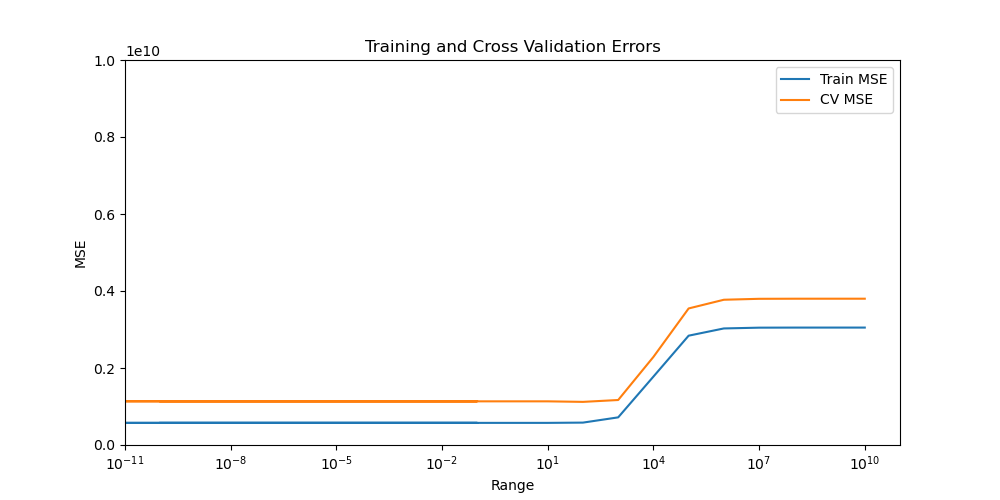

The optimal lambda for degree value 1 regularization is: 100.0
The minimum cross validation MSE for degree value 1 is: 1120012415.8904498


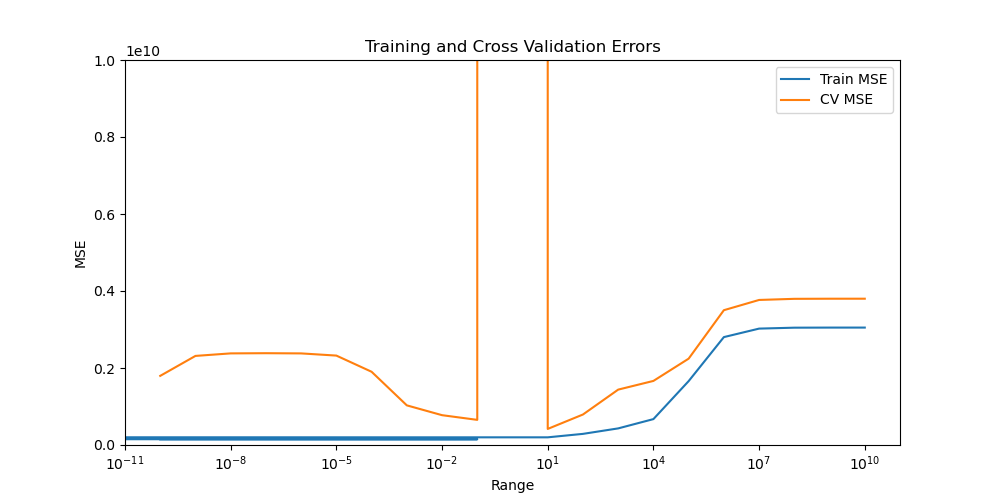

The optimal lambda for degree value 2 regularization is: 10.0
The minimum cross validation MSE for degree value 2 is: 417539929.4845713


c:\Users\sasin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.78884e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\sasin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


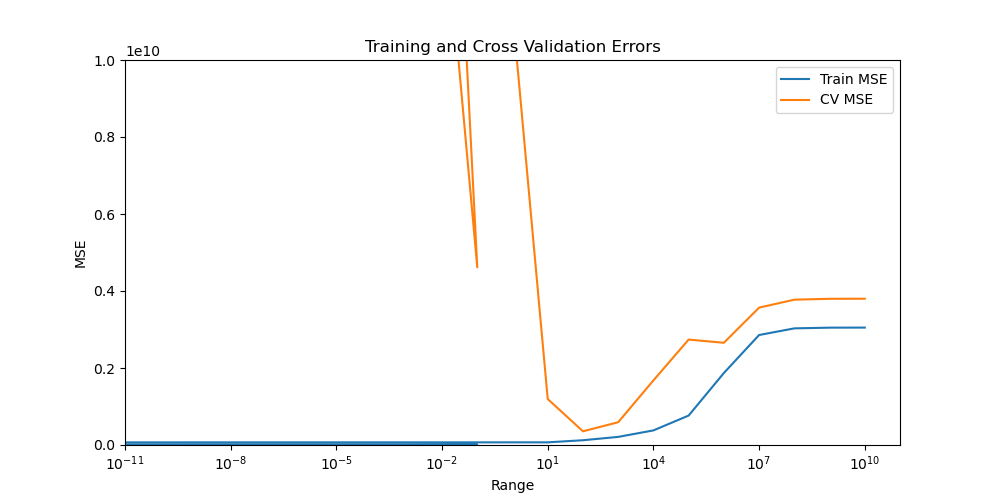

The optimal lambda for degree value 3 regularization is: 100.0
The minimum cross validation MSE for degree value 3 is: 355727092.00200164


c:\Users\sasin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.08296e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\sasin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.36344e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\sasin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


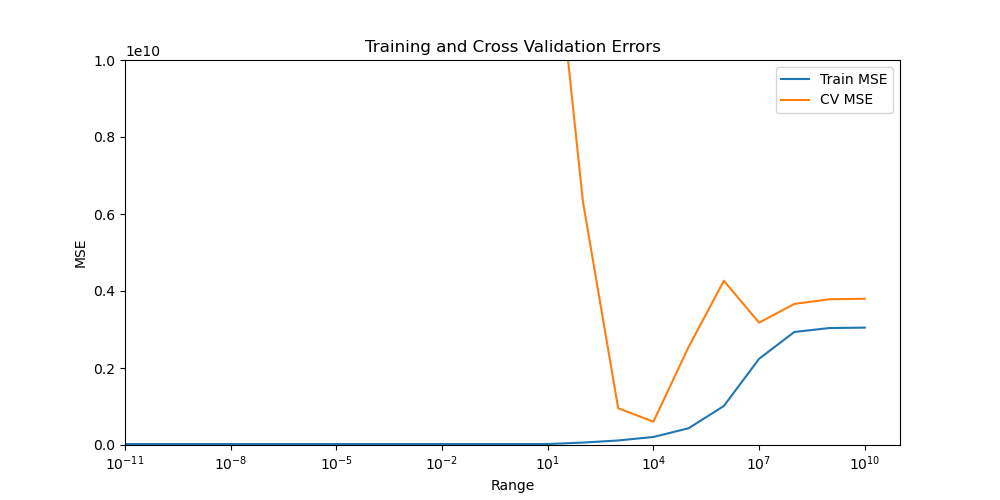

The optimal lambda for degree value 4 regularization is: 10000.0
The minimum cross validation MSE for degree value 4 is: 605809588.0343039
The optimal degree for regularization is: 3
The lambda for the optimal degree is: 100.0


In [17]:
# Initialize lists to save the errors, models, and feature transforms
lambda_range = np.array([1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2, 1e-1, 0.0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
train_mses_mses = []
cv_mses_mses = []
num_steps = len(lambda_range)
optimal_lambdas = []
degrees = []
maxdegree = 4
# Function to plot the training and cross validation errors 
def plot_train_cv_mses(range, train, cv, title):
    plt.figure(figsize=(10, 5))
    plt.plot(range, train, label='Train MSE')
    plt.plot(range, cv, label='CV MSE')
    plt.legend()
    plt.xlabel('Range')
    plt.ylabel('MSE')
    plt.ylim(0, 1e10)
    plt.xscale('log')  # This is to make the lambda range more readable
    plt.title(title)
    plt.show()


# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,maxdegree+1):

    train_mses = []
    cv_mses = []
    models = []
    polys = []
    scalers = []
    optimal_degree = degree
    for i in range(num_steps):
    
        lambda_ = lambda_range[i]

        # Add polynomial features to the training set
        poly = PolynomialFeatures(optimal_degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)
    
        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    
        # Create and train the model
        model = Ridge(alpha=lambda_)
        model.fit(X_train_mapped_scaled, y_train )
    
        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)
    
        # Add polynomial features and scale the cross validation set
        X_cv_mapped = poly.transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
        # Compute the cross validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

    plot_train_cv_mses(lambda_range, train_mses, cv_mses, 'Training and Cross Validation Errors')
    plt.xlabel('Lambda')
    # Find the index of the smallest cross-validation MSE
    optimal_lambda_index_for_degree = np.argmin(cv_mses)

    # Find the optimal lambda using the index
    optimal_lambda_for_degree = lambda_range[optimal_lambda_index_for_degree]

    print(f"The optimal lambda for degree value {degree} regularization is: {optimal_lambda_for_degree}")
    print(f"The minimum cross validation MSE for degree value {degree} is: {cv_mses[optimal_lambda_index_for_degree]}")

    cv_mses_mses.append(cv_mses[optimal_lambda_index_for_degree])
    train_mses_mses.append(train_mses[optimal_lambda_index_for_degree]) 
    optimal_lambdas.append(optimal_lambda_for_degree)
    degrees.append(degree)
    
optimal_degree_index = np.argmin(cv_mses_mses)
optimal_degree = degrees[optimal_degree_index]

print(f"The optimal degree for regularization is: {optimal_degree}")
print(f"The lambda for the optimal degree is: {optimal_lambdas[optimal_degree_index]}")


In [18]:
print(train_mses_mses)
print(cv_mses_mses)

[581520174.8575681, 199171729.8487028, 123816337.82597974, 208532409.17976874]
[1120012415.8904498, 417539929.4845713, 355727092.00200164, 605809588.0343039]


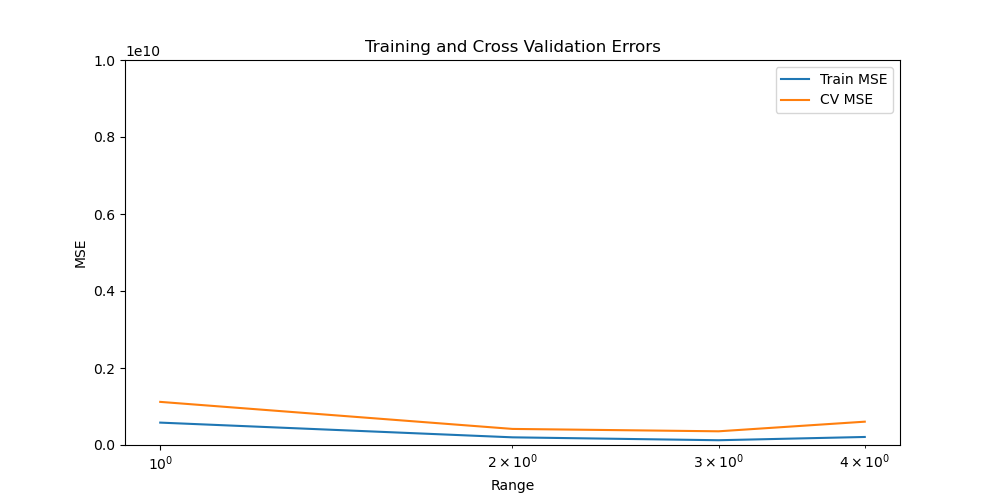

In [19]:

plot_train_cv_mses(degrees, train_mses_mses, cv_mses_mses, 'Training and Cross Validation Errors')

## Accuracey test

In [79]:
lambda_= 100
optimal_degree = 3

In [74]:
lambda_ = float(lambda_)
degree = int(optimal_degree)
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

# Train the model
model = Ridge(alpha=lambda_)
model.fit(X_train_mapped_scaled, y_train)


Ridge(alpha=100.0)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target values using the model
yhat_test = model.predict(X_test_mapped_scaled)

# Calculate the metrics

mae_test = mean_absolute_error(y_test, yhat_test)
mse_test = mean_squared_error(y_test, yhat_test)
r2_test = r2_score(y_test, yhat_test)

print('Test MAE: %f' % mae_test)
print('Test MSE: %f' % mse_test)
print('Test R2 Score: %f' % r2_test)

print("Model accuracy: ", r2_test * 100)

Test MAE: 24114.953000
Test MSE: 2225600981.504100
Test R2 Score: 0.603088
Model accuracy:  60.30879344537592


## Neural Networks

### Prepare the Data

In [24]:
# Add polynomial features
degree = int(optimal_degree)
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [26]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

### Build and train the models

In [29]:
def build_models(lambda_):
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(15, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(20, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )
    
    model_3 = Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(16, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(8, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(4, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )

    model_list = [model_1, model_2, model_3]
    
    return model_list

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize lists that will contain the errors for each model
nn_train_mses_mses = []
nn_cv_mses_mses = []
nn_lambdas = []
lambda_range = np.array([1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2, 1e-1, 0.0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
# Build the models
nn_models = build_models(lambda_)

# Loop over the the models
for model in nn_models:
  

  nn_cv_mses = []
  nn_train_mses = []


  for lambda_ in lambda_range:  
    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    print("Done!\n")

    
    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

  nn_train_mses_mses.append(nn_train_mses[np.argmin(nn_cv_mses)])
  nn_cv_mses_mses.append(nn_cv_mses[np.argmin(nn_cv_mses)]) 
  nn_lambdas.append(lambda_range[np.argmin(nn_cv_mses)])

Training model_1...
Done!

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_1...
Done!

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_1...
Done!

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_1...
Done!

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training model_1...
Done!

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training model_1...
Done!

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training model_1...
Done!

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_1...
Done!

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_1...
Done!

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_1...
Done!

28/28 ━━━━━━━━━━━━━

In [91]:
print(f"The optimal lambda for regularization is: {nn_lambdas}")
print(f"The minimum cross validation MSE is: {nn_cv_mses_mses}")
print(f"The minimum training MSE is: {nn_train_mses_mses}")
print(f"The optimal model is: {nn_models[np.argmin(nn_cv_mses_mses)].name}")
print(f"The optimal lambda is: {nn_lambdas[np.argmin(nn_cv_mses_mses)]}")

The optimal lambda for regularization is: [1e-06, 1e-09, 1e-09]
The minimum cross validation MSE is: [1080995388.883571, 881812758.811181, 1049829334.2774591]
The minimum training MSE is: [77975953.44570087, 76131446.58341376, 293063953.96040636]
The optimal model is: model_2
The optimal lambda is: 1e-09


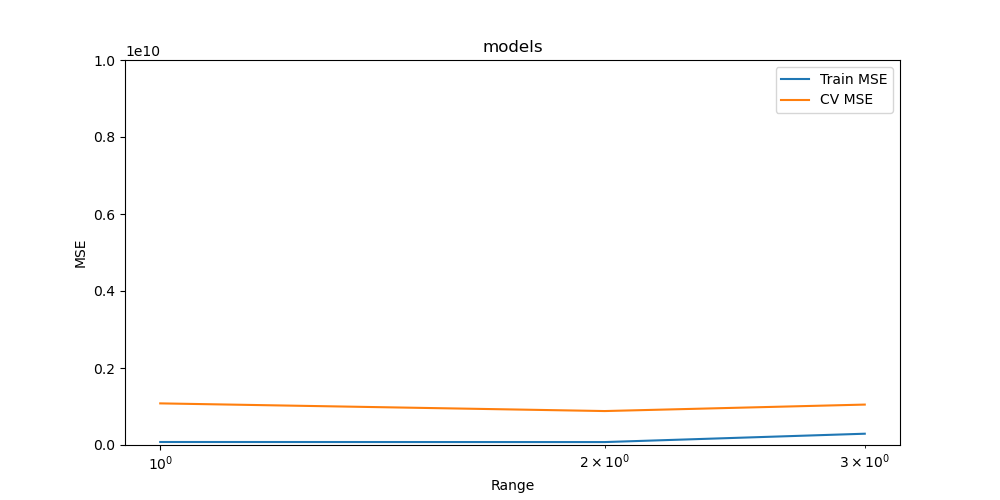

In [92]:
models_range = range(1, len(nn_models) + 1)
plot_train_cv_mses(models_range,nn_train_mses_mses, nn_cv_mses_mses,"models")

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model_num = 2

tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        Dense(20, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(20, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(1, activation = 'linear') 
    ], name = "my_model" 
)

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

model.fit(X_train_mapped_scaled, y_train, epochs=5)


# Make predictions
yhat_test = model.predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat_test) / 2

"""
print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

"""
mae_test = mean_absolute_error(y_test, yhat_test)
mse_test = mean_squared_error(y_test, yhat_test)
r2_test = r2_score(y_test, yhat_test)

print('Test MAE: %f' % mae_test)
print('Test MSE: %f' % mse_test)
print('Test R2 Score: %f' % r2_test)

print("Model accuracy: ", r2_test * 100)

Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 39575523328.0000
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39562366976.0000
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39502471168.0000
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39274590208.0000
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38482169856.0000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test MAE: 168890.377978
Test MSE: 34530578336.654495
Test R2 Score: -5.158158
Model accuracy:  -515.8158306906087


In [92]:
df_test = pd.read_csv('data//test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [93]:
column_names = df.columns
print(column_names)

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')


In [97]:
df_pred =df_test[column_names[:-2]]

In [95]:
df_pred.head()

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,20,5,6,468.0,144.0,270.0,882.0,896,0,0,...,0,1.0,730.0,140,0,0,0,120,0,0
1,20,6,6,923.0,0.0,406.0,1329.0,1329,0,0,...,0,1.0,312.0,393,36,0,0,0,0,12500
2,60,5,5,791.0,0.0,137.0,928.0,928,701,0,...,1,2.0,482.0,212,34,0,0,0,0,0
3,60,6,6,602.0,0.0,324.0,926.0,926,678,0,...,1,2.0,470.0,360,36,0,0,0,0,0
4,120,8,5,263.0,0.0,1017.0,1280.0,1280,0,0,...,0,2.0,506.0,0,82,0,0,144,0,0


In [98]:
x_pred = np.array(df_pred.iloc[:, :])
x_pred.reshape(-1, 1)

x_pred.shape

(1459, 28)

In [99]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_pred_imputed = imputer.fit_transform(x_pred)

In [100]:
# Add polynomial features
degree = int(optimal_degree)
poly = PolynomialFeatures(degree, include_bias=False)
X_pred_mapped = poly.fit_transform(x_pred_imputed)

In [105]:
# Fit the StandardScaler
scaler.fit(X_pred_mapped)

# Transform the data
X_pred_mapped_scaled = scaler.transform(X_pred_mapped)

In [106]:
y_nn_pred = model.predict(X_pred_mapped_scaled)

In [107]:
y_nn_pred

array([120490.57, 210045.54, 163711.66, ..., 141803.93,  98978.62,
       237375.64])

In [108]:
# Convert the numpy array to a DataFrame
df_predicted = pd.DataFrame(y_nn_pred, columns=['Prediction'])

# Save the DataFrame to a CSV file
df_predicted.to_csv('df_pred.csv', index=False)

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model_num = 2

tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        Dense(20, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(20, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(1, activation = 'linear') 
    ], name = "my_model" 
)

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

model.fit(X_train_mapped_scaled, y_train, epochs=5)


# Make predictions
y_pred = model.predict(X_pred_mapped_scaled)

Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 39576633344.0000
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39574409216.0000
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39558045696.0000
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39486959616.0000
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39247122432.0000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [112]:
y_pred

array([[1193.29],
       [ 266.62],
       [ 654.18],
       ...,
       [ 673.96],
       [1455.67],
       [2882.92]], dtype=float32)